In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
X = df.drop("condition", axis=1)
y = df["condition"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
rfc = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=4, random_state=42)

rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
train_accuracy = accuracy_score(y_train, rfc.predict(X_train))
test_accuracy = accuracy_score(y_test, rfc.predict(X_test))

train_accuracy, test_accuracy

(0.9178743961352657, 0.7666666666666667)

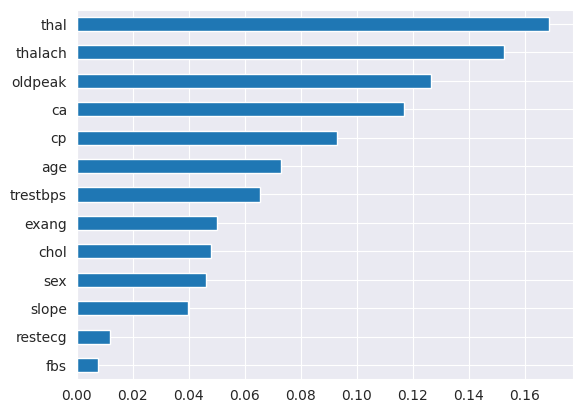

In [18]:
importances = pd.Series(rfc.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh")
plt.show()

In [21]:
cm = confusion_matrix(y_test, rfc.predict(X_test))
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}\nTrue Positives: {tp}")

True Negatives: 37
False Positives: 11
False Negatives: 10
True Positives: 32
